In [1]:
#Importing the necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Libraries for KMeans clustering and associated
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Libraries for Hierarchical clustering and associated
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
#Libraries for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA


In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset into country_df dataframe
country_df = pd.read_csv('Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Understanding the dataframe

In [4]:
#Shape of the dataframe
country_df.shape

(167, 10)

<font color = green > That means there are 167 datapoints/records/country_records in the dataset and 10 columns

In [5]:
#Info of the dataframe
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


<font color = green > It is clear that all the column contains 167 records which is same as original shape. Hence no null values present in the dataframe. This is the initial check for null values.
Also other observation is that except Country column all other columns are numerical columns.

In [6]:
#Describe function showing the initial statistics of the columns
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<font color = green> The above statistics shows that the features such as ``health,total_fer`` are in comparable range where as ``income,gdpp`` varies around a wide range. This confirms the need for scaling of our dataset. Also other important point we can come across here is for the inflation feature. The minimum value for inflation is -4.21. Infact this is the only feature in our dataset with negative minimum value. 

#### Checking for NULLs

In [7]:
#checking for null values again in our dataframe.
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Checking for Outliers

In [8]:
# Checking for outliers in the continuous variables
num_country_df = country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [9]:
# Checking Outliers at 25%,50%,75%,90%,95% and 99%
num_country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


<font color = green> From the distribution above, it is clear that there are outliers present for many features such as child_mort,income,inflation,exports since the numbers are not gradually increasing.
Anyway we will take it forward, do our PCA and then see for outliers again there.

#### Correlation matrix

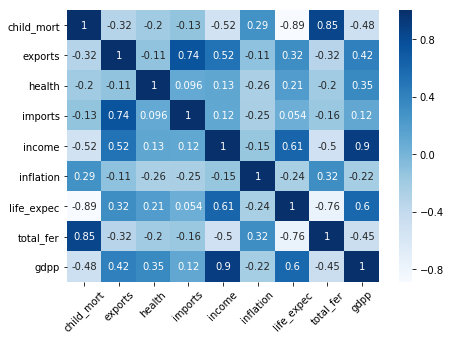

In [10]:
plt.figure(figsize=(7,5))
heat_map = sns.heatmap(country_df.corr(),annot=True,cmap="Blues")
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)
plt.show()

<font color = green> Initial check of the correlation matrix with the above heatmap displays that there is high correlation of 0.85 between `child mortality and total fer` and value of 0.9 between `income and gdpp` which is obvious one. 
Also we can see high negative correlation between `life expectancy and child mortality as well `life expectancy and total_fer` which are also obvious understandings.

#### Data Preparation

<font color = green> From data dictionary, we can see that the columns `exports,imports and health` are given as percentage of Total GDP. We can convert this columns from percentage value to normal range.

In [11]:
country_df['exports'] = (country_df['exports'] * country_df['gdpp'])/100
country_df['imports'] = (country_df['imports'] * country_df['gdpp'])/100
country_df['health'] = (country_df['health'] * country_df['gdpp'])/100

In [12]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
#We look into statistics after the above conversion
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [14]:
#Rescaling
country_df_to_be_scaled = country_df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

# Instantiate
scaler = StandardScaler()

# Fit_transform
country_df_scaled = scaler.fit_transform(country_df_to_be_scaled)
country_df_scaled.shape

(167, 9)

In [15]:
#After the above rescaling we can see that the dataset is nd array and needs to be converted back to original form.
country_df_scaled = pd.DataFrame(country_df_scaled)
country_df_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

In [16]:
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#### PCA on the dataset

In [17]:
#Importing th PCA module and using the random state of 42
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)

In [18]:
#Performing the PCA on ourr scaled dataframe
pca.fit(country_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
#List of PCA components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

<font color = green> After observing the pca components as above, we could find that there are 9 components formed listed as numpy arrays corresponding to our 9 feature varaibles existing in the original dataset.

##### _Now we will see how much of the total variance is explained by each of the principal components and hence make a call, how many PC's to be taken and proceeded to clustering._

In [20]:
#Explained variance ratio
pca.explained_variance_ratio_.round(2)

array([0.59, 0.18, 0.1 , 0.06, 0.03, 0.02, 0.01, 0.  , 0.  ])

<font color = green> The `explained_varaiance_ratio_ gives out the amount of variance explained by each principal components. If we see the above list, we can see that about 59% of variance is explained by the first component alone, second PC explains about 18%, third 10% and so on. <br> 
<font color = red> *_Depending on how much percentage of variance should be explained by our model, we can take a final call for PCs for our model._*

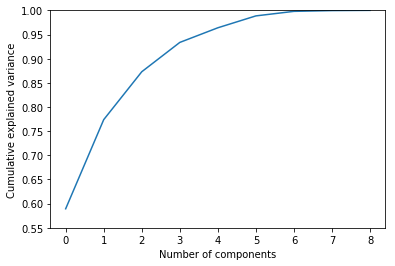

In [21]:
#Plotting the screeplot
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim([0.55,1.0])
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

<font color = green> From the above Screeplot we can find that around 96% of the variance is explained by 5 components.

In [22]:
#We can understand now how the original variables are loaded on the principal components
cols = list(country_df_scaled.columns)
pca_df = pd.DataFrame({'Feature':cols,'PC1': pca.components_[0],'PC2': pca.components_[1],'PC3': pca.components_[2],'PC4': pca.components_[3],'PC5': pca.components_[4]})

In [23]:
pca_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


In [24]:
#We can go do Dimensionality reduction by taking only 5 principal components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 5)

In [25]:
country_df_pca = pca_final.fit_transform(country_df_scaled)
country_df_pca.shape

(167, 5)

In [26]:
country_df_pca_final = np.transpose(country_df_pca)

In [27]:
country_df_pca_final

array([[-2.63633780e+00, -2.37829162e-02, -4.59228259e-01,
        -2.72347181e+00,  6.49103499e-01,  3.59501355e-02,
        -3.34457119e-01,  3.18403890e+00,  3.81774167e+00,
        -4.68004699e-01,  1.49946356e+00,  1.47143260e+00,
        -1.01526893e+00,  8.44643313e-01, -1.51885284e-02,
         3.96103473e+00, -4.03753630e-01, -2.36423532e+00,
        -7.15991977e-01, -1.01873279e+00,  2.51255457e-01,
        -1.13016378e+00,  1.65858523e-01,  2.69856192e+00,
         2.79686469e-01, -2.75209021e+00, -2.76318275e+00,
        -1.17989039e+00, -2.43945813e+00,  3.39718173e+00,
        -5.24266414e-01, -3.23809665e+00, -3.18604011e+00,
         6.91419616e-01, -1.30373674e-01, -1.48910540e-02,
        -1.94929834e+00, -3.11589805e+00, -2.04824110e+00,
         4.30050318e-01, -2.57289374e+00,  8.45886963e-01,
         2.31375359e+00,  1.67439409e+00,  4.37874567e+00,
        -3.68475106e-01, -3.03979341e-01, -8.37625700e-01,
        -3.37888814e-01, -1.05344224e+00, -1.94891730e+0

In [28]:
pcs_df = pd.DataFrame({'PC1':country_df_pca_final[0],'PC2':country_df_pca_final[1],'PC3':country_df_pca_final[2],'PC4':country_df_pca_final[3],'PC5':country_df_pca_final[4]})
pcs_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


#### Outlier Analysis after PCA

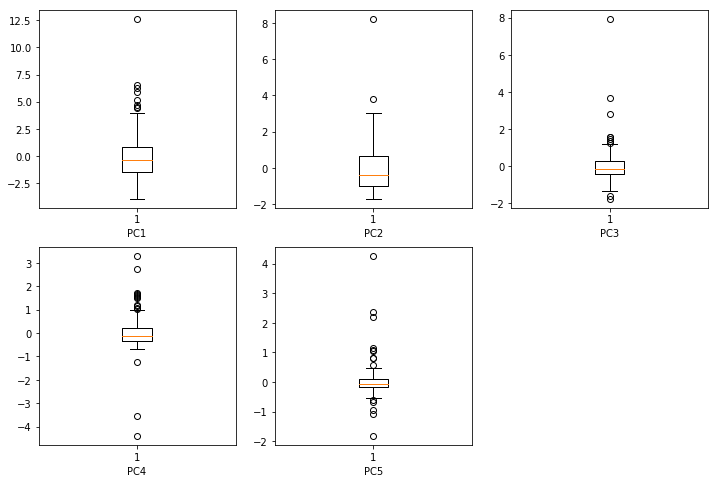

In [29]:
#Boxplots for outlier analysis for different Principal Components
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.boxplot(pcs_df['PC1'])
plt.xlabel('PC1')
plt.subplot(2,3,2)
plt.boxplot(pcs_df['PC2'])
plt.xlabel('PC2')
plt.subplot(2,3,3)
plt.boxplot(pcs_df['PC3'])
plt.xlabel('PC3')
plt.subplot(2,3,4)
plt.boxplot(pcs_df['PC4'])
plt.xlabel('PC4')
plt.subplot(2,3,5)
plt.boxplot(pcs_df['PC5'])
plt.xlabel('PC5')
plt.show()

<font color = green> From the above boxplots for different Principal Components we can see that, there are outliers present in each of the PC's. PC2 seems to be the one least affected by outliers while coming to componets 4 and 5 there are many outliers present. We can remove these datapoints before proceeding to clustering, but since we know we have only around 167 datapoints with us, dropping these many points will result in loosing in many information. Hence we will go ahead with clustering.

<font color = red> *_In each of the above boxplots we can see the mean line is centered around 0. This is because of the fact that we have done Standardisation in our dataset._*

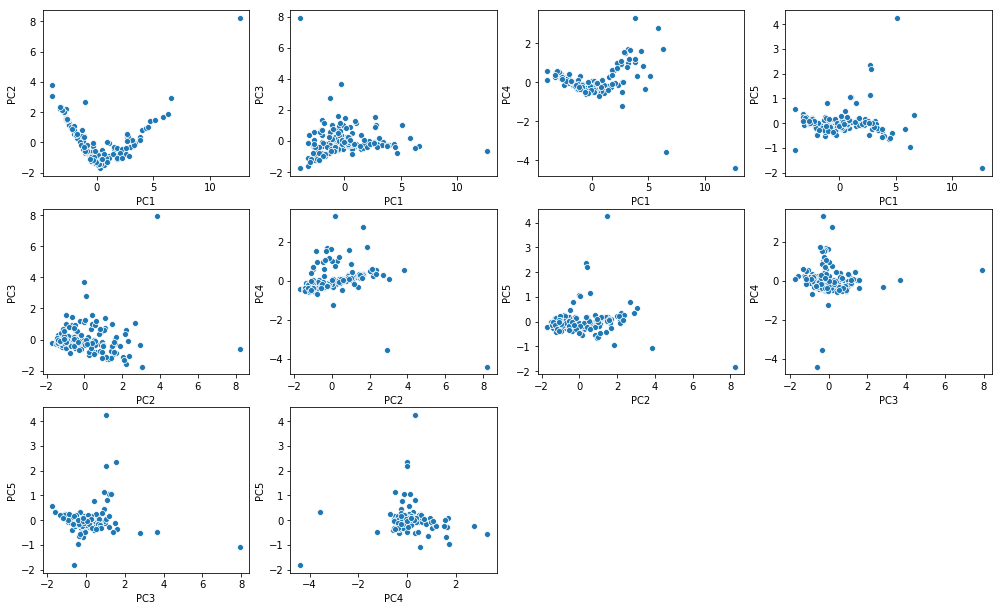

In [30]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
plt.figure(figsize=(17,14))
plt.subplot(4,4,1)
sns.scatterplot(x='PC1',y='PC2',data=pcs_df)
plt.subplot(4,4,2)
sns.scatterplot(x='PC1',y='PC3',data=pcs_df)
plt.subplot(4,4,3)
sns.scatterplot(x='PC1',y='PC4',data=pcs_df)
plt.subplot(4,4,4)
sns.scatterplot(x='PC1',y='PC5',data=pcs_df)
plt.subplot(4,4,5)
sns.scatterplot(x='PC2',y='PC3',data=pcs_df)
plt.subplot(4,4,6)
sns.scatterplot(x='PC2',y='PC4',data=pcs_df)
plt.subplot(4,4,7)
sns.scatterplot(x='PC2',y='PC5',data=pcs_df)
plt.subplot(4,4,8)
sns.scatterplot(x='PC3',y='PC4',data=pcs_df)
plt.subplot(4,4,9)
sns.scatterplot(x='PC3',y='PC5',data=pcs_df)
plt.subplot(4,4,10)
sns.scatterplot(x='PC4',y='PC5',data=pcs_df)
plt.show()

#### Clustering

In [31]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [32]:
#Let's check the Hopkins measure
hopkins(pcs_df)

0.888586795708277

In [33]:
#Since the value is > 0.5 the given dataset has a good tendency to form clusters.

### K-Means Clustering

In [34]:
k_means_df = pcs_df.copy()

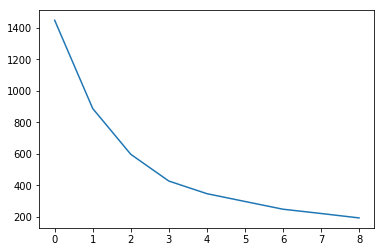

In [35]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(k_means_df)
    ssd.append(model_clus.inertia_)
plt.plot(ssd)

<font color = green> From the Elbow Curve above we can see that, we can't decide on a clear elbow from the above plot since the plot looks like a fairly smooth curve. But with a common intuition we can say that the number of clusters can be 4.

<font color = green> We can check again the above notion, with the help of other important approach of `Silhoette Score`.

In [36]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(k_means_df)
    sse_.append([k, silhouette_score(k_means_df, kmeans.labels_)])

Text(0.5, 1.0, 'Silhouette Score Analysis')

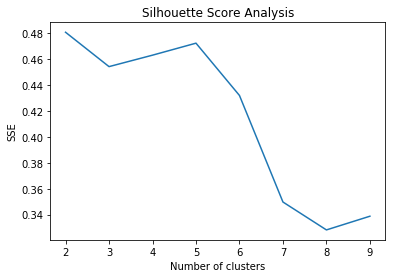

In [37]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);
plt.ylabel('SSE')
plt.xlabel('Number of clusters')
plt.title("Silhouette Score Analysis")

<font color = green> From the above Silhouette score plot we can see that,we are getting good scores for cluster numbers = 2,3,4 and 5. We can see a dip in the score going from 2 to 3 and an increase further going on to 5 clusters. We have found and proceeded with 5 PC's as well. Hence we will go with the initial intuition of 5 clusters(Note: All the cluster sie of 2,3,4,5 are giving comparitive good Silhoeutte Scores).

In [38]:
#K-Means with k =5
cluster_model1 = KMeans(n_clusters=5,max_iter=50,random_state=50)
cluster_model1.fit(k_means_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [39]:
final_df =pcs_df
final_df.index = pd.RangeIndex(len(final_df.index))
final_df_kmeans = pd.concat([final_df, pd.Series(cluster_model1.labels_)], axis=1)
final_df_kmeans.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']

In [40]:
final_df_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [41]:
size_list=[]
for i in range(0,5):
    size_list.append(final_df_kmeans.loc[final_df_kmeans['ClusterID']== i].shape)

In [42]:
size_list

[(88, 6), (30, 6), (47, 6), (1, 6), (1, 6)]

<font color = green> From above cluster we can see that number of datapoints/ countries in each cluster are 88,30,47,1 and 1. The 1 country only in one cluster can be the outlier countries. They can be those countries which are high up in the chart which are socially economically forward and a developed nation. Same way other can be the most underdeveloped country or the one which is socio-economically very backward one.

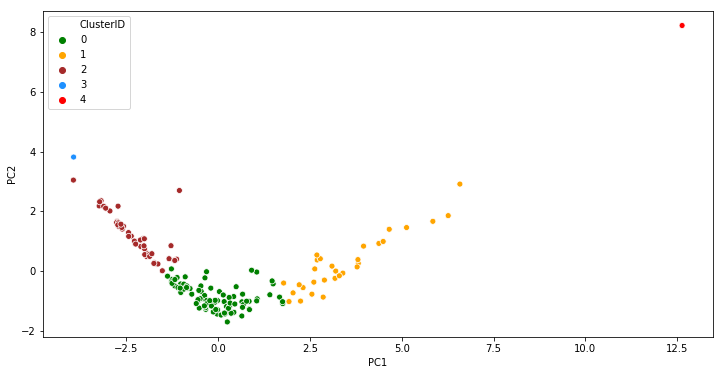

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',palette=['green','orange','brown','dodgerblue','red'],data=final_df_kmeans)
plt.show()

In [44]:
#Merging the original dataset along with the one with principal components and Cluster labels.
country_df_final = pd.merge(country_df,final_df_kmeans,left_index=True,right_index=True)
country_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649103,-1.026404,-0.258645,-0.276882,0.077087,0


In [45]:
country_df_final.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1,inplace=True)

In [46]:
country_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


### Cluster Analysis

<font color = green> First we can see for the countries in cluster 3 and 4 which got intuitive after the above scatter plot. We know that both the clusters contain only 1 country each. We can see, what these clusters indicate.

In [47]:
country_df_final.loc[country_df_final['ClusterID']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,3


In [48]:
country_df_final.loc[country_df_final['ClusterID']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,4


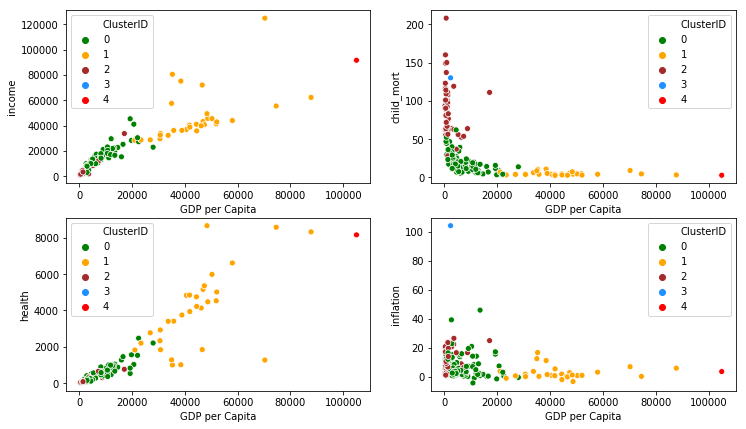

In [49]:
#Plot between GDPP and various important features segregated by clusters for more intuitions.
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.scatterplot(x='gdpp',y='income',hue = 'ClusterID',data=country_df_final,palette=['green','orange','brown','dodgerblue','red'])
plt.xlabel('GDP per Capita')
plt.subplot(2,2,2)
sns.scatterplot(x='gdpp',y='child_mort',hue = 'ClusterID',data=country_df_final,palette=['green','orange','brown','dodgerblue','red'])
plt.xlabel('GDP per Capita')
plt.subplot(2,2,3)
sns.scatterplot(x='gdpp',y='health',hue = 'ClusterID',data=country_df_final,palette=['green','orange','brown','dodgerblue','red'])
plt.xlabel('GDP per Capita')
plt.subplot(2,2,4)
sns.scatterplot(x='gdpp',y='inflation',hue = 'ClusterID',data=country_df_final,palette=['green','orange','brown','dodgerblue','red'])
plt.xlabel('GDP per Capita')
plt.show()

<font color = green> From the above visualisations we can see that, Cluster 1 and Cluster 4 are the best performing or in other terms developed countries. These countries are having good GDP per capita as well as good health indicators as well as good income. We could find that the health indicator as well as income are kind of having linear relationship with the GDP per capita with these clusters at the higher end. We are getting a fairly intuitive idea of which clusters we need to concentrate(Clusters 0,2 and 3).

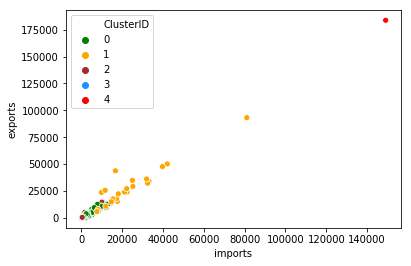

In [50]:
#Imports vs Exports with different Clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x='imports',y='exports',hue = 'ClusterID',data=country_df_final,palette=['green','orange','brown','dodgerblue','red'])
plt.show()

In [51]:
child_mort_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).child_mort.mean())
exports_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).exports.mean())
health_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).health.mean())
imports_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).imports.mean())
income_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).income.mean())
inflation_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).inflation.mean())
life_expec_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean = pd.DataFrame(country_df_final.groupby(["ClusterID"]).gdpp.mean())

In [52]:
df = pd.concat([pd.Series([0,1,2,3,4]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean], axis=1)

In [53]:
df.columns = ["Cluster","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df

,Cluster,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364
1,1,5.006667,23900.726667,4010.316333,20228.370000,46676.666667,2.741567,80.480000,1.791667,44103.333333
2,2,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319
3,3,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000
4,4,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000


<font color = green> The above statistics for each feature for each cluster helps us identify which are the clusters having underperforming contries and then we can deep dive into the cluster. Out of all the features we can cooncentrate more on `gdpp,child_mort and income` which are kind of direct indicators that segregates each cluster.

In [54]:
cols= ['Cluster','gdpp_mean','child_mort_mean','income_mean']
df[cols]

,Cluster,gdpp_mean,child_mort_mean,income_mean
0,0,7332.636364,20.918182,13455.568182
1,1,44103.333333,5.006667,46676.666667
2,2,1900.255319,90.793617,3870.702128
3,3,2330.000000,130.000000,5150.000000
4,4,105000.000000,2.800000,91700.000000


<font color = green> 1. The first point we can make clearly is about the `Cluster no 4` - which is having an high gdp and income and very less child mortality rate. And also as seen above Cluster 4 contains the couontry `Luxembourg`. So surely, this is not a  country which need to consider for our aid. <br>2. `Cluster Number 1` is also having significantly high value for gdpp and income(even though less than Cluster 4) and low child mortality ratio. Hence can be ignored for our aid program. We can see which all countries come under this cluster in a short while. <br>3. Now we are left out with 3 clusters - `Cluster 0,2 and 3`, out of which we know Cluster 3 contains `Nigeria and is like standout cluster`, having very low gdpp and income and where the child mortality rate is very very low and would be one of the country that needs to be considered for the aid.<br> 4. `Cluster 2` is some other cluster which we need to see for. We can take it forward to analyse countries within Cluster 2 and see which comes the backward countries in that cluster.

In [55]:
#We will go and analyse for the Cluster 2.
country_df_cluster2 = country_df_final.loc[country_df_final.ClusterID ==2]

In [56]:
country_df_cluster2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,2


In [57]:
country_df_cluster2_gdp = country_df_cluster2.sort_values(['gdpp'], ascending=[False])
country_df_cluster2_income = country_df_cluster2.sort_values(['income'], ascending=[False])
country_df_cluster2_child_mort = country_df_cluster2.sort_values(['child_mort'], ascending=[True])

In [58]:
cols = ['country','gdpp','child_mort','income']
country_df_cluster2_gdp[cols].tail()

,country,gdpp,child_mort,income
132,Sierra Leone,399,160.0,1220
112,Niger,348,123.0,814
37,"Congo, Dem. Rep.",334,116.0,609
88,Liberia,327,89.3,700
26,Burundi,231,93.6,764


<font color = green> We can see that if we sort the cluster 2 countries based on the GDPP, we can see the 5 economically backward countries based on gdpp are the coutries - `Sierra Leone,Niger,Democratic Republic of Congo,Liberia,Burundi`. GDPP of these countries are way less than the average GDPP of this cluster itself as well as the income is also way less than the mean par of `3870` for this cluster.

In [59]:
country_df_cluster2_income[cols].tail()

,country,gdpp,child_mort,income
31,Central African Republic,446,149.0,888
112,Niger,348,123.0,814
26,Burundi,231,93.6,764
88,Liberia,327,89.3,700
37,"Congo, Dem. Rep.",334,116.0,609


<font color = green> We now sorted the countries based on the income and the lowest that can be ranked on the income are `Central African Republic,Niger,Burundi,Liberia,Democratic Republic of Congo`, out of which 4 countries are the one listed with lowest gdpp as well.

In [60]:
country_df_cluster2_child_mort[cols].tail()

,country,gdpp,child_mort,income
97,Mali,708,137.0,1870
31,Central African Republic,446,149.0,888
32,Chad,897,150.0,1930
132,Sierra Leone,399,160.0,1220
66,Haiti,662,208.0,1500


<font color = green> Here we can see that countries which come under the highest child mortality ratio. Even though these countries are having coparatively better income,their gdpp is pretty low as well as child mortality is very high. Countries here are `Mali,Central African Republic,Chad,Sierra Leone,Haiti`

<font color = red> Now what is left is to simply analyse the Cluster 0 as well to find out is there any worst performing countries there which we would have missed out from Cluster2

In [61]:
#for the Cluster 0.
country_df_cluster0 = country_df_final.loc[country_df_final.ClusterID ==0]

In [62]:
country_df_cluster0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,0


In [63]:
country_df_cluster0_gdp = country_df_cluster0.sort_values(['gdpp'], ascending=[False])
country_df_cluster0_income = country_df_cluster0.sort_values(['income'], ascending=[False])
country_df_cluster0_child_mort = country_df_cluster0.sort_values(['child_mort'], ascending=[True])

In [64]:
country_df_cluster0_gdp[cols].tail()

,country,gdpp,child_mort,income
83,Kyrgyz Republic,880,29.6,2790
27,Cambodia,786,44.4,2520
12,Bangladesh,758,49.4,2440
146,Tajikistan,738,52.4,2110
109,Nepal,592,47.0,1990


<font color = green> If you compare these above countries of Cluster 0 with Cluster2, all countries here are having less child mortality rate compared to cluster 2 countries which we identified earlier. Income is comparitively little better as well while gdpp are less, in which we can see `Nepal` being one of the country with both gdpp and income as very less. Infact Nepal can be seen values lesser than even Chad or Mali.

In [65]:
country_df_cluster0_income[cols].tail()

,country,gdpp,child_mort,income
83,Kyrgyz Republic,880,29.6,2790
27,Cambodia,786,44.4,2520
12,Bangladesh,758,49.4,2440
146,Tajikistan,738,52.4,2110
109,Nepal,592,47.0,1990


In [66]:
country_df_cluster0_child_mort[cols].tail()

,country,gdpp,child_mort,income
12,Bangladesh,758,49.4,2440
146,Tajikistan,738,52.4,2110
69,India,1350,58.8,4410
154,Turkmenistan,4440,62.0,9940
107,Myanmar,988,64.4,3720


<font color = green> From the above clusters we can see compared to the african countries listed above,which we founded from cluster 2, these values are far below the level and hence we can ignore these countries.

<font color  = maroon > So now we have got a list of countries by analysing various clusters and their socio-economic indicators such as `GDPP, Child Mortality and Income` and we have finalised a list of countries which would be in need of aid for their development.
_ <b> `Nigeria,Sierra Leone,Niger,Democratic Republic of Congo,Liberia,Burundi,Central African Republic,Mali,Chad,Haiti,Nepal and Tajikistan are the countries we chose`_.

<font color = green> <b> So now we are done clustering with K-Means algorithm and have done cluster analysis on clusters thus formed. We can take this approach and reiterate through Hierarchical Clustering also and find out what insight we can get from it. </b>

#### Hierarchical Clustering

In [67]:
#pcs_df is the dataframe with only Principal components. We can input this to the Hierarchical Clustering algorithm to find the dendrogram.
pcs_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


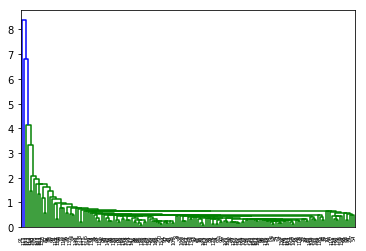

In [68]:
# Single linkage Hierarchical Clustering
mergings = linkage(pcs_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

<font color = green> Single Linkage uses the distance between 2 clusters defined by the shortest distance between points in the two clusters. Here from the dendrogram given by the Single Linkage Hierarchical Clustering is difficult to interpret,since all the trees of the dendrogram are closely linked.

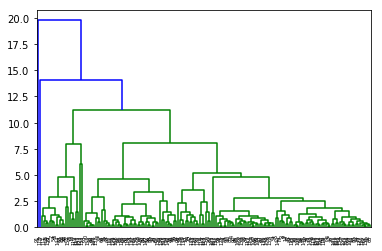

In [69]:
# Complete Linkage
mergings = linkage(pcs_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

<font color = green> The above shows Complete Linkage Hierarchical clustering which takes into account Maximum distance between any 2 points in the cluster. Cutting the dendrogram at an appropriate level depends on the clusters hence formed.

In [70]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [71]:
# assign cluster labels
country_df_final['cluster_labels'] = cluster_labels
country_df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


In [72]:
country_df_final.loc[country_df_final.cluster_labels==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,4,3


In [73]:
country_df_final.loc[country_df_final.cluster_labels==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,3,4


In [74]:
country_df_final.loc[country_df_final.cluster_labels==1].shape

(97, 12)

In [75]:
country_df_final.loc[country_df_final.cluster_labels==0].shape

(47, 12)

In [76]:
country_df_final.loc[country_df_final.cluster_labels==2].shape

(21, 12)

<font color = green> So what we see here after Hierarchical clustering is that, first we went with the Single Linkage clustering which is defined by the shortest distance points in the 2 clusters. We couldn't get any proper understanding from the dendrogram.
With the Complete Linkage Clustering(defined by maximum distance between 2 points in the cluster), we can see a much clearer dendrogram where we can cut from and select clusters. As similar to what we have selected in k-means, we can select around 5 clusters by cutting the dendrogram around 10.0.
By analysing the two clusters 3 and 4 here and the shape of the other clusters it is similar to the findings what we have from K-Means.
Hence we will finalise what we have provided with K-Means.

<font color = red> <b> FINAL LIST OF COUNTRIES WHICH WE CHOOSE ARE - `Nigeria,Sierra Leone,Niger,Democratic Republic of Congo,Liberia,Burundi,Central African Republic,Mali,Chad,Haiti,Nepal and Tajikistan`